In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score, confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.pipeline import Pipeline
import pickle
from sklearn.model_selection import cross_val_score
from keras.models import Sequential, load_model
from keras import layers
#from keras.layers.core import Dropout
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from sklearn.multioutput import MultiOutputClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Datasets

## Credit Card Dataset

* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others,5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)

## Bank Churn Dataset

* RowNumber: corresponds to the record (row) number and has no effect on the output. This column will be removed.
* CustomerId: contains random values and has no effect on customer leaving the bank. This column will be removed.
* Surname : the surname of a customer has no impact on their decision to leave the bank. This column will be removed.
* CreditScore: can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
* Geography: a customer's location can affect their decision to leave the bank. We'll keep this column.
* Gender: it's interesting to explore whether gender plays a role in a customer leaving the bank. We'll include this column, too.
* Age:this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
* Tenure:refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
* Balance:also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
* NumOfProducts:refers to the number of products that a customer has purchased through the bank.
* HasCrCard: denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
* IsActiveMember: active customers are less likely to leave the bank, so we'll keep this.
* EstimatedSalary: as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
* Exited: whether or not the customer left the bank. This is what we have to predict.

In [50]:
#Loading the original dataset
dataset =pd.read_csv("/content/drive/MyDrive/Google Drive/Churn Modelling/UCI_Credit_Card.csv")

In [51]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


# Data Preprocessing

#### Replacings and Renamings

In [52]:
dataset.rename(columns={'PAY_0':'PAY_1'},inplace=True)

dataset.rename(columns={'default.payment.next.month':'Default_Prediction'},inplace=True)
#Replacing values in the features with their Actual names
#dataset['SEX']=dataset['SEX'].replace({1:'male', 2:'female'})
#Replacing education and marriage values
dataset['EDUCATION']=dataset['EDUCATION'].replace({0:4,5:4,6:4})
#dataset['EDUCATION']=dataset['EDUCATION'].replace({1:'graduate school',2:'university',3:'high school',4:'others'})
dataset['MARRIAGE']=dataset['MARRIAGE'].replace({0:3})
#dataset['MARRIAGE']=dataset['MARRIAGE'].replace({1:'married',2:'single',3:'others'})
#Replacing the values of all PAY_X features -1,-2 with 0.
for i in range(1,7):
    field='PAY_'+str(i)
    dataset[field]=dataset[field].replace({-1:0})
    dataset[field]=dataset[field].replace({-2:0})
#Dropping the unique ID column
dataset=dataset.drop(columns='ID')

### Handling Outliers

In [53]:
#Finding Outliers in LIMIT_BAL
outliers = []
def Finding_outliers(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
outliers = Finding_outliers(dataset['LIMIT_BAL'])
#Replacing them with mean/median
median = np.median(dataset['LIMIT_BAL'])# Replace with median
for i in outliers:
    c = np.where(dataset['LIMIT_BAL']==i, median, dataset['LIMIT_BAL'])
dataset['LIMIT_BAL']=c


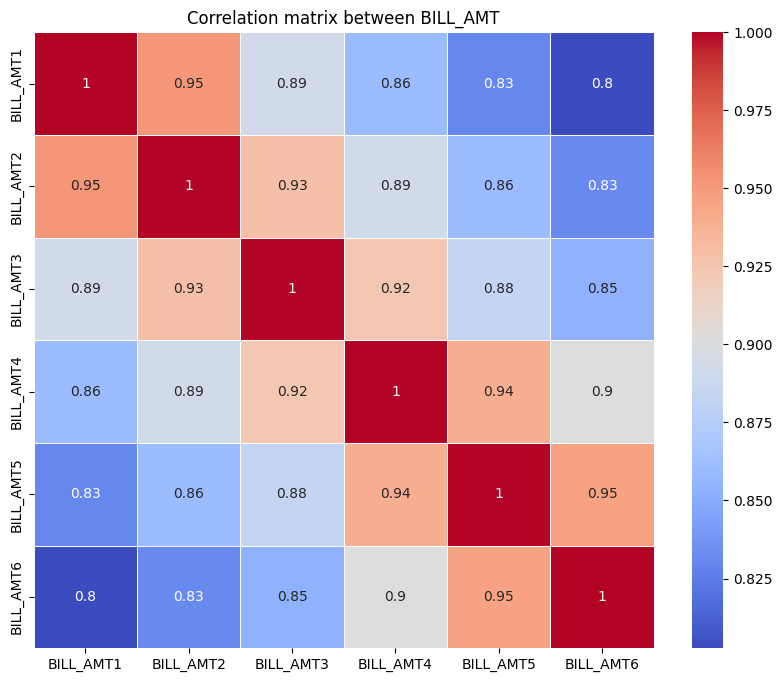

In [54]:
# Carregue seus dados (substitua 'seu_dataframe' pelo nome da variável que contém seus dados)

# Selecione as colunas de 'BILL_AMT' para a matriz de correlação
bill_columns = dataset.filter(like='BILL_AMT')

# Crie a matriz de correlação
correlation_matrix = bill_columns.corr()

# Plote a matriz de correlação usando um mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation matrix between BILL_AMT')
plt.show()

There is high correlation between the BILL_AMTX features. So, dropping the last 5 BILL_AMT features.

In [55]:
dataset=dataset.drop(columns=['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'])

In [56]:
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default_Prediction
0,20000.0,2,2,1,24,2,2,0,0,0,0,3913.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,0,2,0,0,0,2,2682.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [57]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

# Machine Learning Model Selection, Training, Prediction and Assessment

In [59]:
dataset['SEX'] = pd.Categorical(dataset['SEX'])
dataset['EDUCATION'] = pd.Categorical(dataset['EDUCATION'])
dataset['MARRIAGE'] = pd.Categorical(dataset['MARRIAGE'])

## Logistic Regression

In [60]:
# Crie um modelo de regressão logística com statsmodels
lr = sm.Logit(y_train, X_train)

# Ajuste o modelo
result = lr.fit()

# Adicione uma constante aos dados de teste
#X_test = sm.add_constant(X_test)

# Faça previsões usando o modelo ajustado
y_pred = result.predict(X_test)  # Obtém as probabilidades

# Arredonde as probabilidades para obter previsões binárias
y_pred_binary = (y_pred > 0.5).astype(int)

# Calcule a acurácia das previsões usando o accuracy_score do Scikit-Learn
lr_score = accuracy_score(y_test, y_pred_binary)

# Exibir a acurácia
print(result.summary())
print("Acurácia do modelo:", lr_score)

Optimization terminated successfully.
         Current function value: 0.445692
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     Default_Prediction   No. Observations:                24000
Model:                          Logit   Df Residuals:                    23982
Method:                           MLE   Df Model:                           17
Date:                Mon, 16 Oct 2023   Pseudo R-squ.:                  0.1566
Time:                        01:45:03   Log-Likelihood:                -10697.
converged:                       True   LL-Null:                       -12682.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LIMIT_BAL  -2.083e-06   1.73e-07    -12.038      0.000   -2.42e-06   -1.74e-06
SEX           -0.2646      0.

In [61]:
# Usando sklearn
# Call Logistic Regression
lr = LogisticRegression(solver='saga',max_iter=1000)

# Fit the model
#lr.fit(X_train, y_train)

# Predition on test data
#lr_y_pred = lr.predict(X_test)

# Model Evaluation - Accuracy Score
#lr_score = accuracy_score(lr_y_pred, y_test)
#lr_score

## Gaussian Naive Bayes

In [62]:
# Call GaussianNB() Model
gnb = GaussianNB()

# Fit the model
gnb.fit(X_train, y_train)

# Predition on test data
gnb_y_pred = gnb.predict(X_test)

# Model Evaluation - Accuracy Score
gnb_score = accuracy_score(gnb_y_pred, y_test)
gnb_score

0.4053333333333333

## Random Forest Classifier

In [63]:
# Call Model
rf = RandomForestClassifier(n_estimators = 100, random_state = 200)

# Fit the model
rf.fit(X_train, y_train)

# Predition on test data
rf_y_pred = rf.predict(X_test)

# Model Evaluation - Accuracy Score
rf_score = accuracy_score(rf_y_pred, y_test)
rf_score

0.8148333333333333

## Decision Tree Classifier

In [64]:
# Call Model
dt = DecisionTreeClassifier()

# Fit the model
dt.fit(X_train, y_train)

# Predition on test data
dt_y_pred = dt.predict(X_test)

# Model Evaluation - Accuracy Score
dt_score = accuracy_score(dt_y_pred, y_test)
dt_score

0.725

## XGBoost Classifier

In [65]:
xg  = XGBClassifier(max_depth = 10,random_state = 10, n_estimators=220, eval_metric = 'auc', min_child_weight = 3,
                    colsample_bytree = 0.75, subsample= 0.9)
xg.fit(X_train, y_train)
xg_y_pred = xg.predict(X_test)
xg_score = accuracy_score(xg_y_pred, y_test)
xg_score

0.8038333333333333

## K-Nearest Neighbors Classifier (kNN)

In [66]:
# Instantiate the classifier
knn = KNeighborsClassifier()

# Fit the Model
knn.fit(X_train, y_train)

# Make Predicitions with the trained classifier
knn_y_pred = knn.predict(X_test)

# Model Evaluation/Score
knn_score = accuracy_score(knn_y_pred, y_test)
knn_score

0.7536666666666667

## Support Vector Machine Classifier (SVM)

In [67]:
# Instantiate the SVM Model
svm = SVC(kernel = 'rbf', probability = True)

# Fit the model
svm.fit(X_train, y_train)

# Make predictions
svm_y_pred = svm.predict(X_test)

# Model Evaluation/Score
svm_score = accuracy_score(svm_y_pred, y_test)
svm_score

0.7786666666666666

# Cross Validation

In [68]:
models = [lr,gnb,rf,dt,xg,knn,svm]
for model in models:
  model_name = model.__class__.__name__
  scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
  mean_accuracy = np.mean(scores)
  print(f"Acurácia Média ({model_name}):", round(mean_accuracy,3))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Acurácia Média (LogisticRegression): 0.779
Acurácia Média (GaussianNB): 0.412
Acurácia Média (RandomForestClassifier): 0.817
Acurácia Média (DecisionTreeClassifier): 0.726
Acurácia Média (XGBClassifier): 0.8
Acurácia Média (KNeighborsClassifier): 0.754
Acurácia Média (SVC): 0.779


# Metrics

## Accuracy

In [69]:
default = np.where(rf_y_pred >= 0.5,1,0)
(default == y_test).mean()

0.8148333333333333

In [70]:
thresholds = np.linspace(0, 1, 21)

accuracies = []

for t in thresholds:
    acc = accuracy_score(y_test, rf_y_pred >= t)
    accuracies.append(acc)
    print('%0.2f %0.3f' % (t, acc))

0.00 0.221
0.05 0.815
0.10 0.815
0.15 0.815
0.20 0.815
0.25 0.815
0.30 0.815
0.35 0.815
0.40 0.815
0.45 0.815
0.50 0.815
0.55 0.815
0.60 0.815
0.65 0.815
0.70 0.815
0.75 0.815
0.80 0.815
0.85 0.815
0.90 0.815
0.95 0.815
1.00 0.815


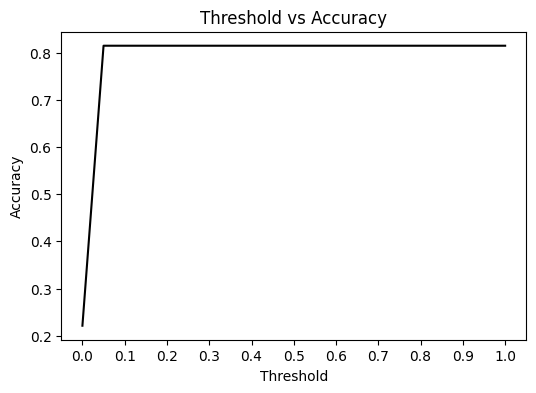

In [71]:
plt.figure(figsize=(6, 4))

plt.plot(thresholds, accuracies, color='black')

plt.title('Threshold vs Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')

plt.xticks(np.linspace(0, 1, 11))

# plt.savefig('04_threshold_accuracy.svg')

plt.show()

## Confusion Table

In [72]:
true_positive = ((rf_y_pred >= 0.5) & (y_test == 1)).sum()
false_positive = ((rf_y_pred >= 0.5) & (y_test == 0)).sum()
false_negative = ((rf_y_pred < 0.5) & (y_test == 1)).sum()
true_negative = ((rf_y_pred < 0.5) & (y_test == 0)).sum()

confusion_table = np.array(
     # predict neg    pos
    [[true_negative, false_positive], # actual neg
     [false_negative, true_positive]]) # actual pos

confusion_table
confusion_table / confusion_table.sum()

array([[0.7325    , 0.04633333],
       [0.13883333, 0.08233333]])

In [73]:
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
precision, recall

(0.6398963730569949, 0.37226827430293896)

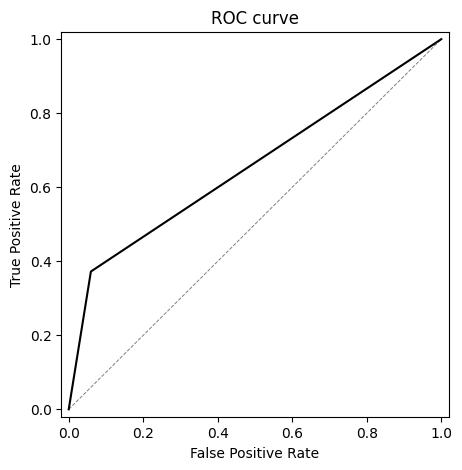

In [74]:
fpr, tpr, thresholds = roc_curve(y_test, rf_y_pred)
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

In [75]:
roc_auc_score(y_test, rf_y_pred)

0.6563887915490728

Interpretation of AUC: the probability that a randomly chosen positive example ranks higher than a randomly chosen negative example

# Adding Bank Data

In [82]:
dataset['ID'] = range(1,30001)
dataset['CreditScore'] = np.random.randint(350, 850, size=30000)
dataset['UF'] = np.random.choice(['AC', 'AL', 'AP', 'AM', 'BA', 'CE',
                                                 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 'PA', 'PB', 'PR',
                                                 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR',
                                                 'SC', 'SP', 'SE', 'TO'], size=30000)
dataset['Tenure'] = np.random.randint(0, 10, size=30000)
dataset['Estimated Salary'] = np.random.uniform(1000.00, 30000, size=30000)
dataset['HasCrCard'] = np.random.choice([1,0],size = 30000)
dataset['Exited_bank'] = np.random.choice([0, 1], size=30000)

In [106]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   LIMIT_BAL           30000 non-null  float64 
 1   SEX                 30000 non-null  category
 2   EDUCATION           30000 non-null  category
 3   MARRIAGE            30000 non-null  category
 4   AGE                 30000 non-null  int64   
 5   PAY_1               30000 non-null  int64   
 6   PAY_2               30000 non-null  int64   
 7   PAY_3               30000 non-null  int64   
 8   PAY_4               30000 non-null  int64   
 9   PAY_5               30000 non-null  int64   
 10  PAY_6               30000 non-null  int64   
 11  BILL_AMT1           30000 non-null  float64 
 12  PAY_AMT1            30000 non-null  float64 
 13  PAY_AMT2            30000 non-null  float64 
 14  PAY_AMT3            30000 non-null  float64 
 15  PAY_AMT4            30000 non-null  

# Multilabel Classification

In [97]:
X = dataset.drop(columns = ['Exited_bank','Default_Prediction','UF'],axis = 1)
y = dataset[['Exited_bank','Default_Prediction']]

In [105]:
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, hamming_loss

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multi-label classifier
classifier = MultiOutputClassifier(RandomForestClassifier())

# Train the classifier using K-fold cross-validation
cv_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores (Accuracy):", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Train the classifier on the full training set
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy and Hamming loss
accuracy = accuracy_score(y_test, y_pred)
hamming_loss = hamming_loss(y_test, y_pred)

print("Accuracy:", accuracy)
print("Hamming Loss:", hamming_loss)

Cross-Validation Scores (Accuracy): [0.41625    0.41416667 0.413125   0.41375    0.41666667]
Mean Accuracy: 0.4147916666666667
Accuracy: 0.4161666666666667
Hamming Loss: 0.33675
